In [35]:
#%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# RTD - Resistor Temperature Device 
# Define Parameters:
# Only needed to run once
r_0 = 500
a = 3.9083E-3
b= -5.775E-7

tempRange = np.arange(-200, 850, 0.01)
c = np.where(tempRange >= 0, 0, -4.183e-12)
def correlation_func():
    return r_0 * (1 + a*tempRange + np.square(tempRange)*b + c*(tempRange - 100)*np.power(tempRange,3))

df = pd.DataFrame()
df['Temperature'] = tempRange
df['Resistance'] = correlation_func()
df.set_index('Resistance')
df.tail()



,Temperature,Resistance
104995,849.95,1952.332461
104996,849.96,1952.347094
104997,849.97,1952.361726
104998,849.98,1952.376359
104999,849.99,1952.390992


In [36]:
## TARGET RESISTANCE IN OHMS
#target_resistance = [189.596, 92.741, 126.093,143.352,86.409,250.437]
target_resistance = [480.816, 543.799, 865.841, 409.841, 1065.324, 176.616]
def calc_temperature(r, df):
    try:
        idx_lower = df[df['Resistance'] <= r]['Resistance'].idxmax()
    except ValueError:
        idx_lower = None
    try:
        idx_upper = df[df['Resistance'] >= r]['Resistance'].idxmin()
    except ValueError:
        # Handle case where all resistances are < r (e.g., if r is very high)
        idx_upper = None

    print(f"Measured Resistance (r): {r} Ohms")
    #print(f"Index for R <= r: {idx_lower}")
    #print(f"Index for R >= r: {idx_upper}")

    R_lower = df.loc[idx_lower, 'Resistance']
    T_lower = df.loc[idx_lower, 'Temperature']
    R_upper = df.loc[idx_upper, 'Resistance']
    T_upper = df.loc[idx_upper, 'Temperature']

    tempFinal = T_lower + (r - R_lower)*((T_upper - T_lower)/(R_upper - R_lower))

    print(f"Temp: {np.round(tempFinal,3)} Celsius")

for i in target_resistance:
    calc_temperature(i, df)


Measured Resistance (r): 480.816 Ohms
Temp: -9.803 Celsius
Measured Resistance (r): 543.799 Ohms
Temp: 22.488 Celsius
Measured Resistance (r): 865.841 Ohms
Temp: 192.699 Celsius
Measured Resistance (r): 409.841 Ohms
Temp: -45.812 Celsius
Measured Resistance (r): 1065.324 Ohms
Temp: 302.846 Celsius
Measured Resistance (r): 176.616 Ohms
Temp: -160.525 Celsius


<Axes: title={'center': 'Resistance value Pt100'}, xlabel='Degrees Celcius', ylabel='Ohms'>

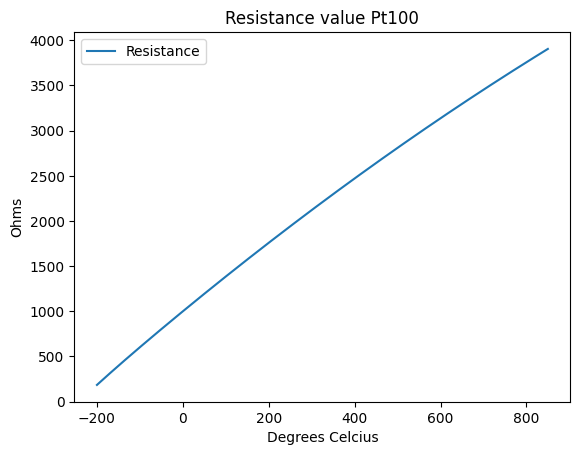

In [33]:
df.plot(x='Temperature', y='Resistance', title="Resistance value Pt100", ylabel='Ohms', xlabel="Degrees Celcius")
